In [155]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

In [156]:
df = pd.read_csv('insurance.csv')

In [157]:
df.head()

,age,weight,height,income_lpa,smoker,city,occupation,insurance_premium_category
0,67,119.8,1.56,2.92,False,Jaipur,retired,High
1,36,101.1,1.83,34.28,False,Chennai,freelancer,Low
2,39,56.8,1.64,36.64,False,Indore,freelancer,Low
3,22,109.4,1.55,3.34,True,Mumbai,student,Medium
4,69,62.2,1.60,3.94,True,Indore,retired,High


In [158]:
df.describe()

,age,weight,height,income_lpa
count,100.000000,100.000000,100.000000,100.000000
mean,47.180000,83.894000,1.713200,18.400600
std,16.649312,21.020278,0.110205,16.067465
min,18.000000,51.100000,1.500000,0.530000
25%,34.750000,63.650000,1.610000,2.897500
50%,47.000000,82.300000,1.730000,14.122583
75%,61.000000,101.300000,1.810000,30.162500
max,75.000000,119.800000,1.900000,50.000000


In [159]:
df['age'].unique()

array([67, 36, 39, 22, 69, 53, 19, 31, 73, 58, 29, 25, 42, 28, 49, 61, 66,
       65, 52, 24, 34, 57, 35, 50, 59, 33, 38, 60, 47, 75, 26, 74, 51, 44,
       64, 23, 72, 55, 45, 18, 41, 32, 71, 46, 20, 70, 63, 62, 56, 30, 54,
       37, 27, 40])

### Feature Engineering

In [160]:
# feature 1
df['bmi'] = df['weight']/ (df['height'] ** 2)

In [161]:
# give category to the age columm
def apply_age_category(age):
    if age < 25:
        return 'Young'
    elif age < 45:
        return 'Adult'
    elif age < 60:
        return 'Middle_aged'
    else:
        return 'Senior'

In [162]:
## apply the age category function to the age column using apply function
df['age_group'] = df['age'].apply(apply_age_category)

In [163]:
df.sample(2)

,age,weight,height,income_lpa,smoker,city,occupation,insurance_premium_category,bmi,age_group
98,27,101.1,1.82,28.30,False,Kolkata,business_owner,Low,30.521676,Adult
96,26,113.8,1.54,34.01,False,Delhi,private_job,Low,47.984483,Adult


In [164]:
## lifestyle risk
def lifestyle_risk(row):
    if row['smoker'] == True and row['bmi'] > 30:
        return 'High'
    elif row['smoker'] == True or row['bmi'] > 30:
        return 'Medium'
    else:
        return 'Low'

In [165]:
df['lifestyle_risk'] = df.apply(lifestyle_risk, axis=1)

In [166]:
df['city'].unique()

array(['Jaipur', 'Chennai', 'Indore', 'Mumbai', 'Kota', 'Hyderabad',
       'Delhi', 'Chandigarh', 'Pune', 'Kolkata', 'Lucknow', 'Gaya',
       'Jalandhar', 'Mysore', 'Bangalore'], dtype=object)

In [167]:
## categorise the city column
tier_1_cities = ["Mumbai", "Delhi", "Bangalore", "Chennai", "Kolkata", "Hyderabad", "Pune"]
tier_2_cities = [
    "Jaipur", "Chandigarh", "Indore", "Lucknow", "Patna", "Ranchi", "Visakhapatnam", "Coimbatore",
    "Bhopal", "Nagpur", "Vadodara", "Surat", "Rajkot", "Jodhpur", "Raipur", "Amritsar", "Varanasi",
    "Agra", "Dehradun", "Mysore", "Jabalpur", "Guwahati", "Thiruvananthapuram", "Ludhiana", "Nashik",
    "Allahabad", "Udaipur", "Aurangabad", "Hubli", "Belgaum", "Salem", "Vijayawada", "Tiruchirappalli",
    "Bhavnagar", "Gwalior", "Dhanbad", "Bareilly", "Aligarh", "Gaya", "Kozhikode", "Warangal",
    "Kolhapur", "Bilaspur", "Jalandhar", "Noida", "Guntur", "Asansol", "Siliguri"
]

In [168]:
def categorize_city(city):
    if city in tier_1_cities:
        return 1
    elif city in tier_2_cities:
        return 2
    else: 
        return 3
    
df['city_category'] = df['city'].apply(categorize_city)


In [169]:
df.drop(columns=['weight', 'height', 'smoker', 'age', 'city'], inplace=True)
# since these features are used to make new features, we can drop them from the dataset


In [170]:
# separate features and target variable
X = df.drop(columns=['insurance_premium_category'])
y = df['insurance_premium_category']

In [171]:
X

,income_lpa,occupation,bmi,age_group,lifestyle_risk,city_category
0,2.92000,retired,49.227482,Senior,Medium,2
1,34.28000,freelancer,30.189017,Adult,Medium,1
2,36.64000,freelancer,21.118382,Adult,Low,2
3,3.34000,student,45.535900,Young,High,1
4,3.94000,retired,24.296875,Senior,Medium,2
...,...,...,...,...,...,...
95,19.64000,business_owner,21.420747,Adult,Low,2
96,34.01000,private_job,47.984483,Adult,Medium,1
97,44.86000,freelancer,18.765432,Middle_aged,Low,1
98,28.30000,business_owner,30.521676,Adult,Medium,1


In [172]:
y

0       High
1        Low
2        Low
3     Medium
4       High
       ...  
95       Low
96       Low
97       Low
98       Low
99       Low
Name: insurance_premium_category, Length: 100, dtype: object

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   income_lpa                  100 non-null    float64
 1   occupation                  100 non-null    object 
 2   insurance_premium_category  100 non-null    object 
 3   bmi                         100 non-null    float64
 4   age_group                   100 non-null    object 
 5   lifestyle_risk              100 non-null    object 
 6   city_category               100 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ KB


In [174]:
import seaborn as sns

<Axes: xlabel='insurance_premium_category', ylabel='income_lpa'>

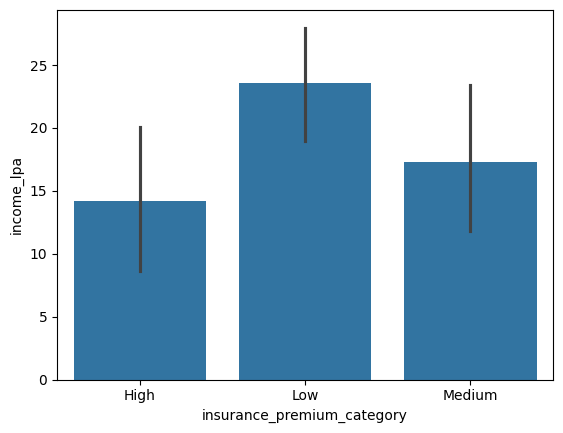

In [175]:
sns.barplot(y='income_lpa',x = 'insurance_premium_category', data=df)

In [176]:
categorical_features = ['age_group', 'lifestyle_risk', 'city_category', 'occupation']
numerical_features = ['bmi', 'income_lpa']

#### using column transformer, we can encode all cateogrical columns at one  

In [177]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)   

### create a pipeline

In [178]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [180]:
pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [181]:
y_pred = pipeline.predict(X_test)

In [182]:
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.89      0.67      0.76        12
         Low       0.60      1.00      0.75         3
      Medium       0.33      0.40      0.36         5

    accuracy                           0.65        20
   macro avg       0.61      0.69      0.63        20
weighted avg       0.71      0.65      0.66        20

Accuracy: 0.65


In [183]:
## save model
import joblib

joblib.dump(pipeline, 'insurance_ml_model.pkl')

['insurance_ml_model.pkl']